In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Task 1


In [44]:
def overlap(bg, src):
    change = np.where((src[:,:,0] < 40) & (src[:,:,1] > 200) & (src[:,:,2] < 40))
    src[change] = bg[change]
    return src.astype(np.uint8)

### Oppenheimer Poster

(-0.5, 789.5, 594.5, -0.5)

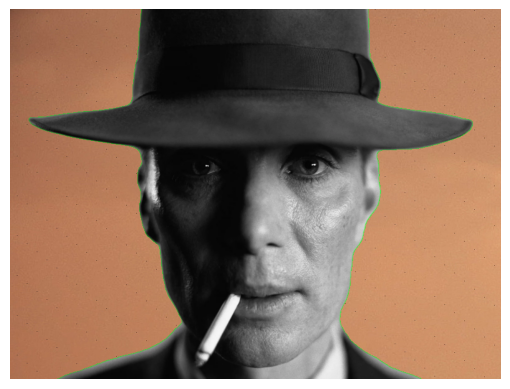

In [45]:
front = cv2.imread("../Images/oppenheimer.png")
background = cv2.imread("../Images/atomicbomb.jpg")
bg_ = cv2.resize(background, (front.shape[1], front.shape[0]))

combined = overlap(background, front)

plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
plt.axis('off')


### Minecraft Poster

(-0.5, 639.5, 359.5, -0.5)

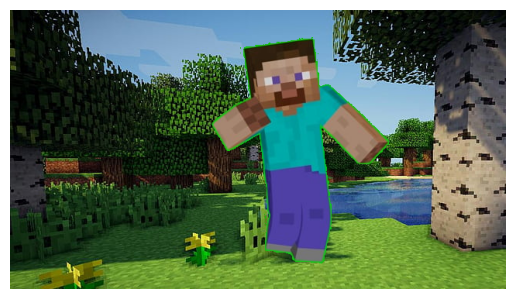

In [46]:
front = cv2.imread("../Images/steve.jpg")
background = cv2.imread("../Images/minecraft.jpg")
bg_ = cv2.resize(background, (front.shape[1], front.shape[0]))

combined = overlap(background, front)

plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
plt.axis('off')

### Number of Images

Considering the image to be an RGB image.  
In an RGB image, each pixel is represented by 3 bytes (1 for each R, G and B). Thus, number of bits per pixel = 8 * 3 = 24 bits  
  

Number of pixels in the given image is given to be 720 x 480  
Therefore, size of the image in bits = 24 * 720 * 480 = 8294400 bits = 1036800 bytes


Given cloud size = 2GB = 2147483648 bytes  
  
Therefore, number of images = 2147483648 / 1036800 = 2071 (approx)


# Task 2

## Bit Quantisation

In [47]:
def bitQuantizeImage(img, k):
    # return img >> k
    step = 2 ** (8-k)
    return (img // step) * step
    

[[74 85 87 ... 67 65 63]
 [82 88 86 ... 67 65 63]
 [85 86 85 ... 67 65 64]
 ...
 [50 50 55 ... 53 52 51]
 [50 52 53 ... 51 50 49]
 [50 52 49 ... 52 49 48]]


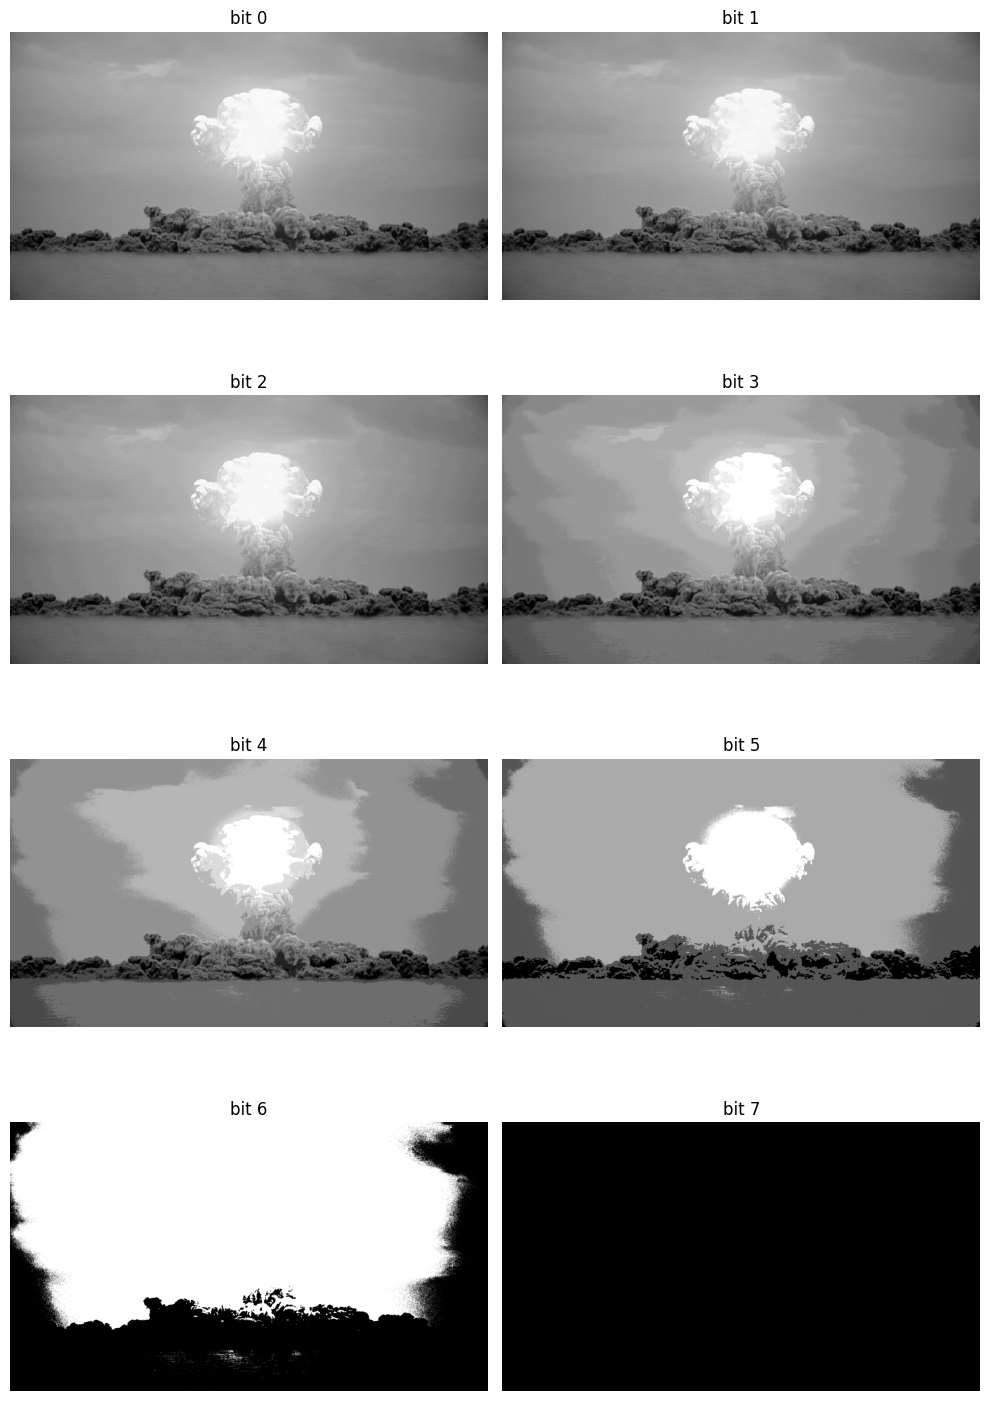

In [48]:
def to_gray(img):
    return np.dot(img[...,:3], [0.299, 0.587, 0.114]).astype(np.uint8)

atom = cv2.imread("../Images/atomicbomb.jpg")
atom = cv2.cvtColor(atom, cv2.COLOR_BGR2RGB)
atomg = to_gray(atom)
print(atomg)
plt.figure(figsize = (10, 15))

atom0 = bitQuantizeImage(atomg, 7)
# print(atom0)
plt.subplot(4, 2, 1)
plt.imshow(atom0, cmap='gray')
plt.axis('off')
plt.title('bit 0')

atom1 = bitQuantizeImage(atomg, 6)
cv2.imwrite("../Images/atomg.png", atomg)
plt.subplot(4, 2, 2)
plt.imshow(atom1, cmap='gray')
plt.axis('off')
plt.title('bit 1')

atom2 = bitQuantizeImage(atomg, 5)
plt.subplot(4, 2, 3)
plt.imshow(atom2, cmap='gray')
plt.axis('off')
plt.title('bit 2')

atom3 = bitQuantizeImage(atomg, 4)
plt.subplot(4, 2, 4)
plt.imshow(atom3, cmap='gray')
plt.axis('off')
plt.title('bit 3')

atom4 = bitQuantizeImage(atomg, 3)
plt.subplot(4, 2, 5)
plt.imshow(atom4, cmap='gray')
plt.axis('off')
plt.title('bit 4')

atom5 = bitQuantizeImage(atomg, 2)
# print(np.max(atom5))
plt.subplot(4, 2, 6)
plt.imshow(atom5, cmap='gray')
plt.axis('off')
plt.title('bit 5')

atom6 = bitQuantizeImage(atomg, 1)
plt.subplot(4, 2, 7)
plt.imshow(atom6, cmap='gray')
plt.axis('off')
plt.title('bit 6')

atom7 = bitQuantizeImage(atomg, 0)
plt.subplot(4, 2, 8)
plt.imshow(atom7, cmap='gray')
plt.axis('off')
plt.title('bit 7')

plt.tight_layout()

## Bit Plane Slicing

In [49]:
def bitSlice(img, bitpos):
    return ((img >> bitpos) & 1)*(2**8 - 1)

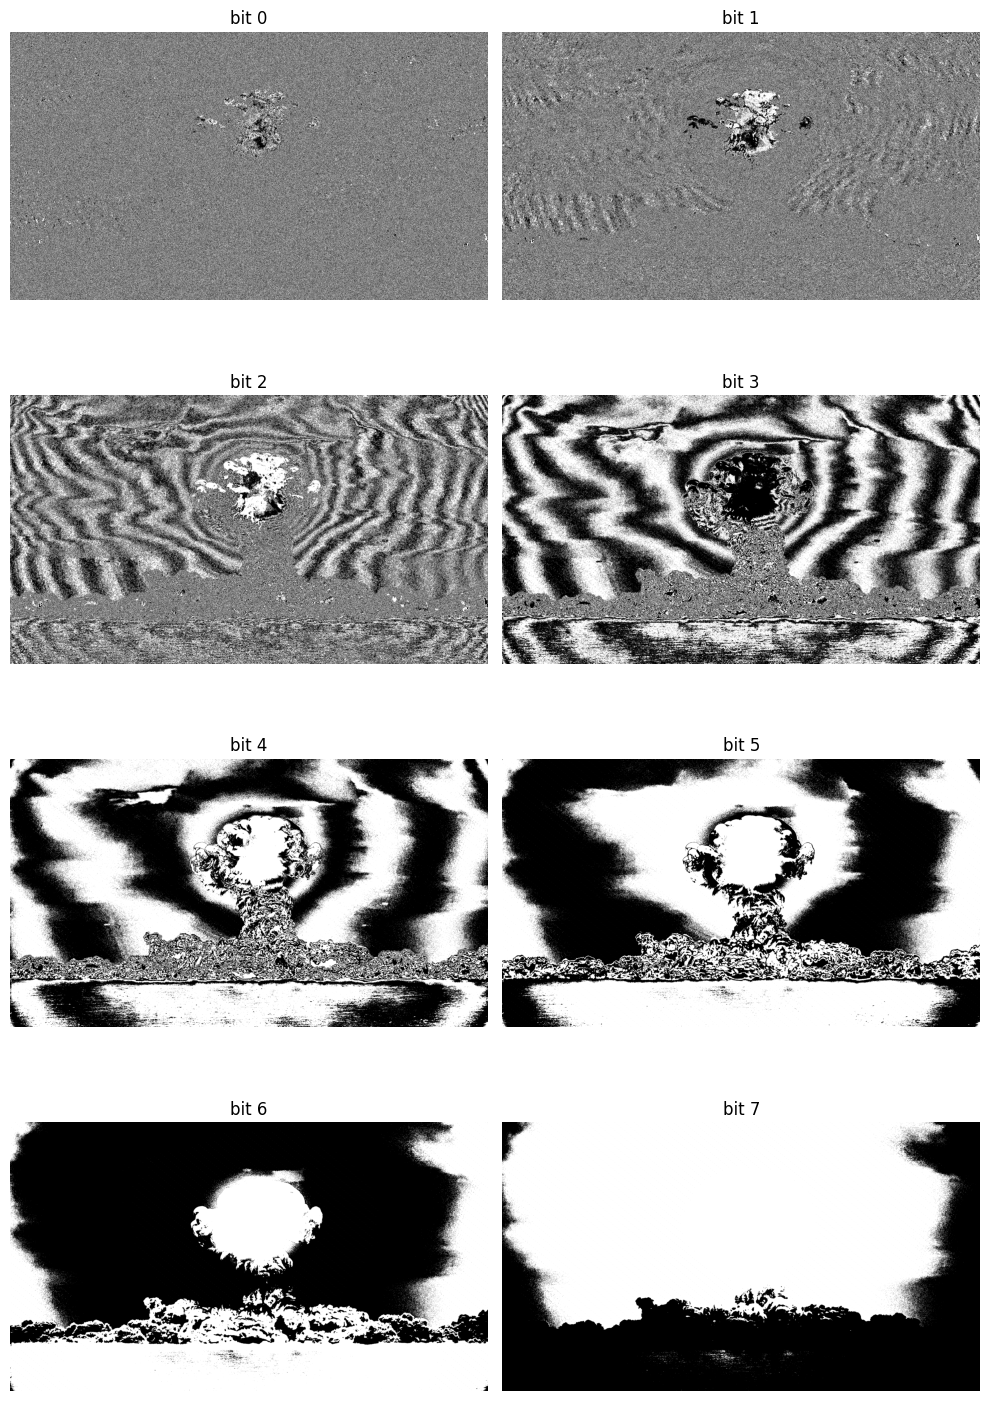

In [50]:
def to_gray(img):
    return np.dot(img[...,:3], [0.299, 0.587, 0.114]).astype(np.uint8)

atom = cv2.imread("../Images/atomicbomb.jpg")
atom = cv2.cvtColor(atom, cv2.COLOR_BGR2RGB)
atomg = to_gray(atom)
plt.figure(figsize = (10, 15))

atom0 = bitSlice(atomg, 0)
plt.subplot(4, 2, 1)
plt.imshow(atom0, cmap = 'gray')
plt.axis('off')
plt.title('bit 0')

atom1 = bitSlice(atomg, 1)
plt.subplot(4, 2, 2)
plt.imshow(atom1, cmap = 'gray')
plt.axis('off')
plt.title('bit 1')

atom2 = bitSlice(atomg, 2)
plt.subplot(4, 2, 3)
plt.imshow(atom2, cmap = 'gray')
plt.axis('off')
plt.title('bit 2')

atom3 = bitSlice(atomg, 3)
plt.subplot(4, 2, 4)
plt.imshow(atom3, cmap = 'gray')
plt.axis('off')
plt.title('bit 3')

atom4 = bitSlice(atomg, 4)
plt.subplot(4, 2, 5)
plt.imshow(atom4, cmap = 'gray')
plt.axis('off')
plt.title('bit 4')

atom5 = bitSlice(atomg, 5)
plt.subplot(4, 2, 6)
plt.imshow(atom5, cmap = 'gray')
plt.axis('off')
plt.title('bit 5')

atom6 = bitSlice(atomg, 6)
plt.subplot(4, 2, 7)
plt.imshow(atom6, cmap = 'gray')
plt.axis('off')
plt.title('bit 6')

atom7 = bitSlice(atomg, 7)
plt.subplot(4, 2, 8)
plt.imshow(atom7, cmap = 'gray')
plt.axis('off')
plt.title('bit 7')

plt.tight_layout()




From the above images we can observe that most of the visual essence of the image is stored in its MSB while the LSB of the image mostly contains noise. Thus in order to store the image with lesser number of bits, we can drop the LSB bits, this helps to maintain most of the visual essence of the image while using lesser bits.

# Task 3

## Contrast Stretching

In [24]:
def colorbar(img):
    pixels = img.reshape((-1, 3))
    unique_rows, counts = np.unique(pixels, axis=0, return_counts=True)

    sorted_indices = np.argsort(-counts)

    sorted_unique_rows = unique_rows[sorted_indices]

    top_colours = sorted_unique_rows[:20]

    plt.figure(figsize=(5, 5))
    for idx, colour in enumerate(top_colours, start=1):
        color_bar = np.full((5, 5, 3), colour, dtype=np.uint8)
        plt.subplot(1, 20, idx)  
        plt.imshow(color_bar)
        plt.axis('off')
    plt.show()


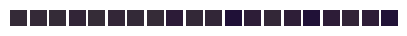

<Figure size 2000x1500 with 0 Axes>

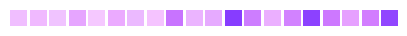

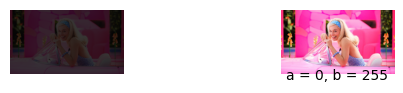

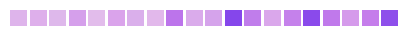

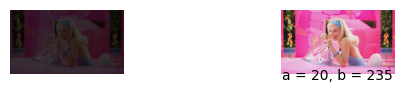

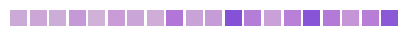

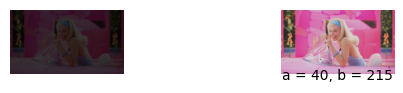

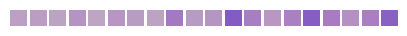

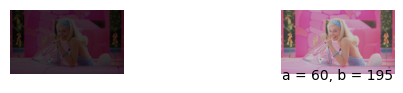

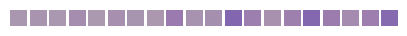

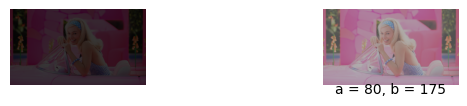

In [25]:

def linContrastStretching(channel, new_min, new_max):
    mino = np.min(channel)
    maxo = np.max(channel)

    stretched = (channel - mino) * ((new_max - new_min) / (maxo - mino)) + new_min
    return stretched.astype(np.uint8)

# imread in cv2 returns a BGR array instead of an RGB array
r1 = cv2.imread("../Images/barbie_flat.png")

red_old = r1[:, :, 2]
green_old = r1[:, :, 1]
blue_old = r1[:, :, 0]

new_min = 0
new_max = 255

colorbar(r1)

plt.figure(figsize=(20, 15))
for i in range(5):

    red_new = linContrastStretching(red_old, new_min, new_max)
    green_new = linContrastStretching(green_old, new_min, new_max)
    blue_new = linContrastStretching(blue_old, new_min, new_max)

    r1_new = cv2.merge((blue_new, green_new, red_new))

    colorbar(r1_new)

    plt.subplot(5, 2, 2*i+1)
    plt.imshow(cv2.cvtColor(r1, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(5, 2 , 2*i+2)
    plt.imshow(cv2.cvtColor(r1_new, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.text(0.5, -0.1, f'a = {new_min}, b = {new_max}', ha='center', transform=plt.gca().transAxes)
    new_min = new_min + 20
    new_max = new_max - 20

plt.tight_layout()






From the above colorbars, we notice that the same colours occupy the top frequency but their intensity differs according to the new max and new min. The distribution of colours do not change, only their intensity does.

# Task 4

## Histogram Equalisation

In [52]:
def histEqualization(img):
    hist, bins = np.histogram(img.flatten(), bins = 256, range = (0, 255))
    print(bins.shape)
    # get the cdf for the histogram
    cdf = hist.cumsum()
    
    ncdf = cdf * 255 / cdf[-1]
    equalised = np.interp(img.flatten(), bins[:-1], ncdf)
    # print(equalised.shape)
    return equalised.reshape(img.shape).astype(np.uint8)

(257,)


(-0.5, 255.5, 255.5, -0.5)

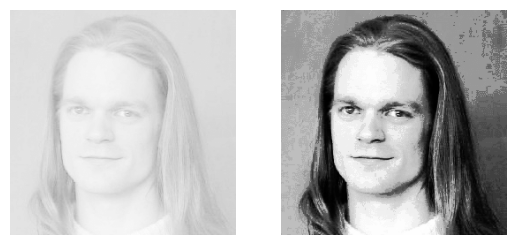

In [53]:
# imread in cv2 returns a BGR array instead of an RGB array
r1 = cv2.imread("../Images/low.png")

# Convert the image to gray scale
r1_g = np.dot(r1[...,:3], [0.114, 0.587, 0.299]).astype(np.uint8)
r1_new = histEqualization(r1_g)

plt.subplot(1, 2, 1)
plt.imshow(r1)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(r1_new, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Task 5

## Explosion Effects

In [54]:
A_iris = [[0.0, 0.2], [0.2, 0.3], [0.3, 0.4], [0.4, 1.0]]
B_iris = [[0.0, 0.0], [-1.0, 0.7], [0.0, 0.0], [1.0, -0.1]]

A_st = [[0.0, 0.2], [0.2, 0.4], [0.4, 0.6], [0.6, 0.8], [0.8, 1.0]]
B_st = [[0.0, 0.0], [0.0, 0.2], [0.0, 0.4], [0.0, 0.6], [0.0, 0.8]]

In [55]:
def LinearI(x):
    if x <= A_iris[0][1]:
        y = B_iris[0][0] * x + B_iris[0][1]
    elif x > A_iris[1][0] and x <= A_iris[1][1]:
        y = B_iris[1][0] * x + B_iris[1][1]
    elif x > A_iris[2][0] and x <= A_iris[2][1]:
        y = B_iris[2][0] * x + B_iris[2][1]
    else:
        y = B_iris[3][0] * x + B_iris[3][1]

    return y   

In [56]:
def LinearS(x):
    if x <= A_st[0][1]:
        y = B_st[0][0] * x + B_st[0][1]
    elif x > A_st[1][0] and x <= A_st[1][1]:
        y = B_st[1][0] * x + B_st[1][1]
    elif x > A_st[2][0] and x <= A_st[2][1]:
        y = B_st[2][0] * x + B_st[2][1]
    elif x > A_st[3][0] and x <= A_st[3][1]:
        y = B_st[3][0] * x + B_st[3][1]
    else:
        y = B_st[4][0] * x + B_st[4][1]

    return y   

In [57]:
pwLinearVec = np.vectorize(LinearI)
pwLinearVecS = np.vectorize(LinearS)

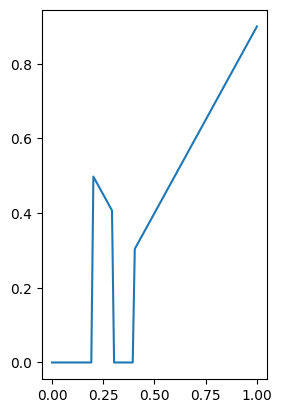

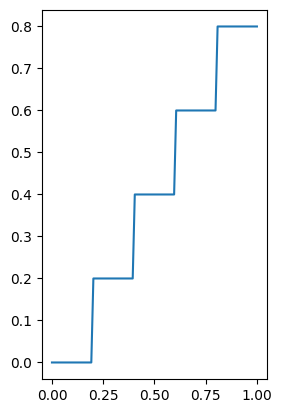

In [58]:
x = np.linspace(0, 1, 100)
y = pwLinearVec(x)

plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.show()

y1 = pwLinearVecS(x)
plt.subplot(1, 2, 2)
plt.plot(x, y1)
plt.show()

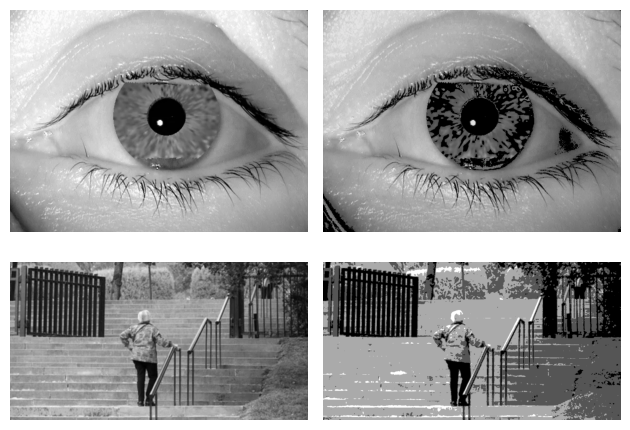

In [134]:
import matplotlib.pyplot as plt

iris = cv2.imread("../Images/iris1.png")
stairs = cv2.imread("../Images/stairs2.png")
stairs = cv2.cvtColor(stairs, cv2.COLOR_BGR2RGB)
stairs_g = np.dot(stairs[...,:3], [0.33, 0.33, 0.33])
stairs_gr = np.uint8(stairs_g)

irisn = pwLinearVec(iris/255)
plt.subplot(2, 2, 1)
plt.imshow(iris)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(irisn)
plt.axis('off')

stairsn = pwLinearVecS(stairs_gr / 255)
plt.subplot(2, 2, 3)
plt.imshow(stairs_gr, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(stairsn, cmap='gray')
plt.axis('off')

plt.tight_layout()


# Task 6

## Finding the function

232


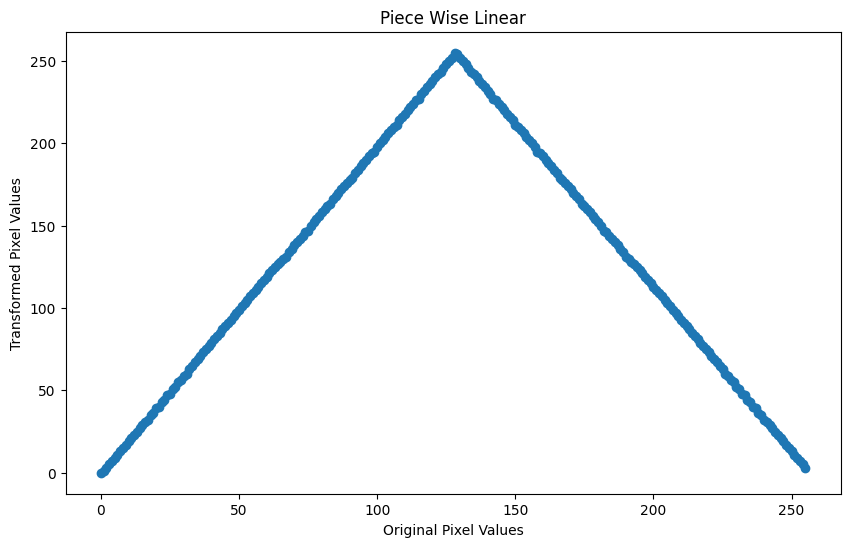

In [135]:
import matplotlib.pyplot as plt

original = cv2.imread("../Images/micro.jpg")
transformed = cv2.imread("../Images/transformed.png")

pwl = {}
original_pixels = original.flatten()
transformed_pixels = transformed.flatten()

pwl = dict(zip(original_pixels, transformed_pixels))

# print(sorted(pwl))
print(pwl[140])

plt.figure(figsize=(10, 6))
plt.scatter(list(pwl.keys()), list(pwl.values()), marker='o')
plt.xlabel('Original Pixel Values')
plt.ylabel('Transformed Pixel Values')
plt.title('Piece Wise Linear')
plt.show()


## Applying transformation to 3 images

In [136]:
def LinearT(x):
    if np.isclose(x, 0):
        y = x
    elif 0 < x <= 128:
        y = 2 * x - 1
    else:
        y = -2 * x + 510

    return y


In [138]:
pwLinearVecT = np.vectorize(LinearT)

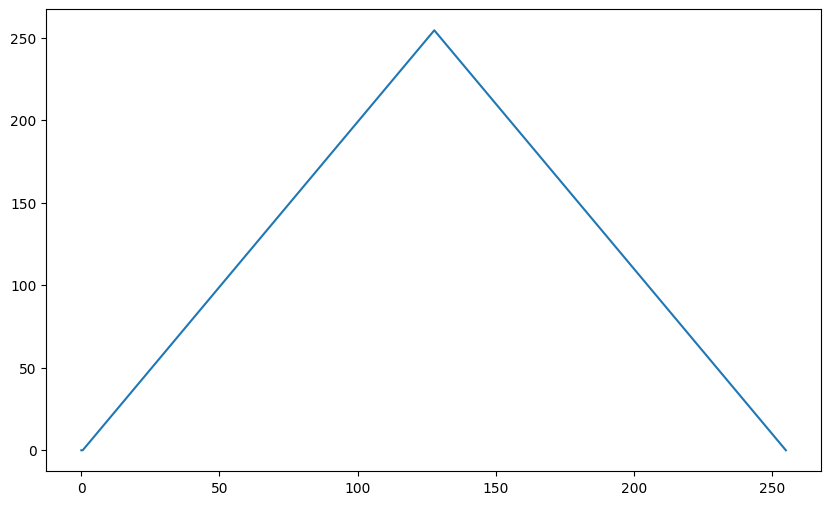

In [137]:
X = np.linspace(0, 255, 500)
Y = pwLinearVecT(X)

plt.figure(figsize=(10, 6))
# plt.subplot(1, 2, 1)
plt.plot(X, Y)
plt.show()

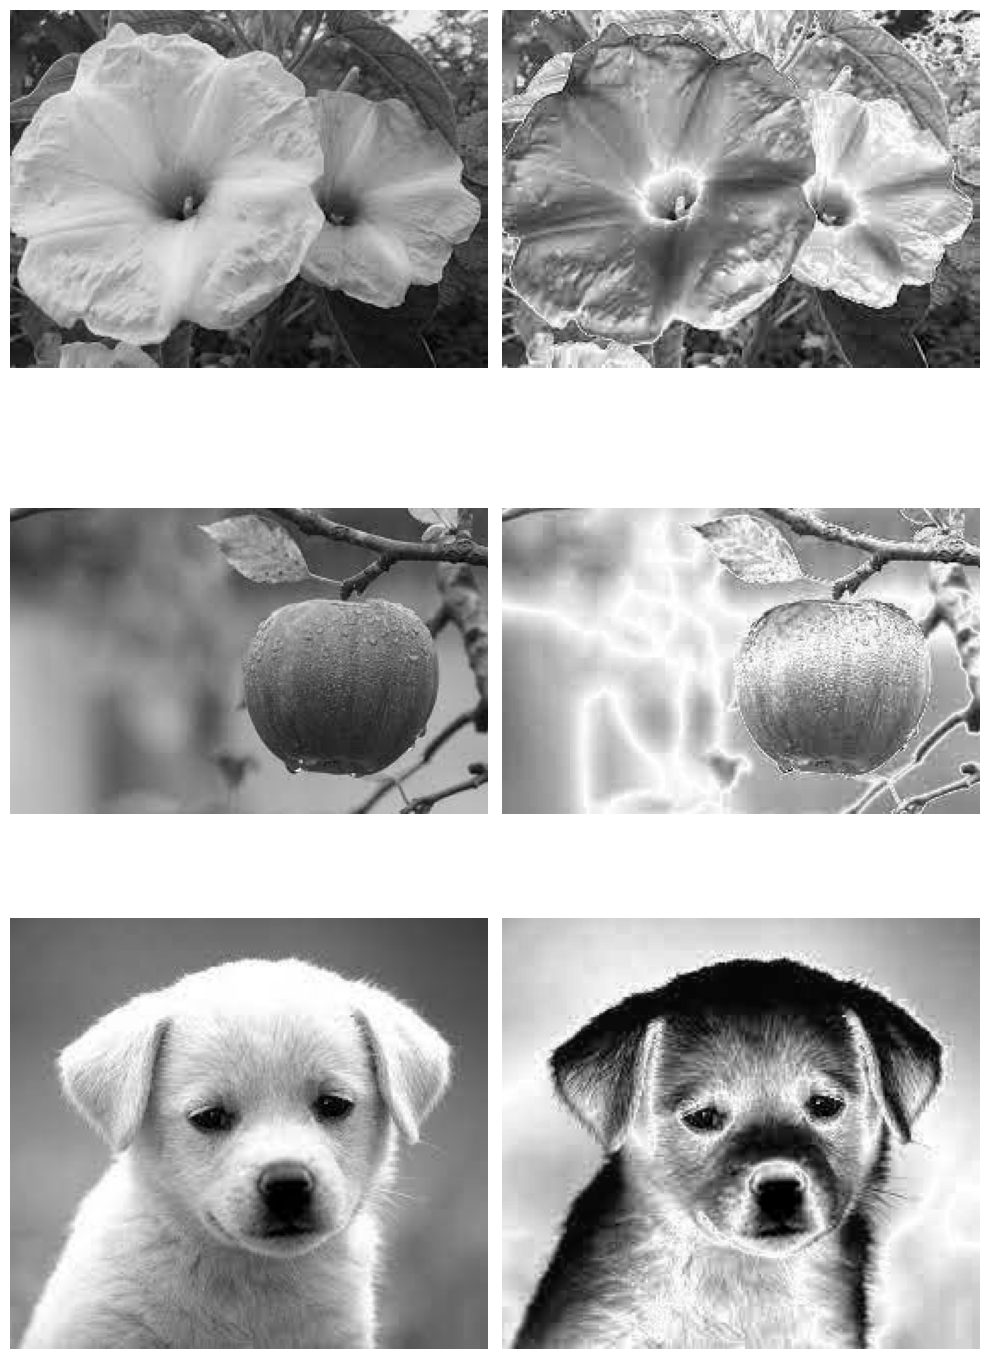

In [153]:
#  images of my choice

plt.figure(figsize=(10, 15))

flower = cv2.imread("../Images/flower.jpeg")
flower_g = np.dot(flower[...,:3], [0.33, 0.33, 0.33]).astype(np.uint8)
flowern = pwLinearVecT(flower_g)
plt.subplot(3, 2, 1)
plt.imshow(flower)
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(flowern, cmap='gray')
plt.axis('off')


fruit = cv2.imread("../Images/fruit.jpeg")
fruit_g = np.dot(fruit[...,:3], [0.33, 0.33, 0.33]).astype(np.uint8)
fruitn = pwLinearVecT(fruit_g)
plt.subplot(3, 2, 3)
plt.imshow(fruit)
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(fruitn, cmap='gray')
plt.axis('off')


dog = cv2.imread("../Images/dog.jpeg")
dog_g = np.dot(dog[...,:3], [0.33, 0.33, 0.33]).astype(np.uint8)
dogn = pwLinearVecT(dog_g)
plt.subplot(3, 2, 5)
plt.imshow(dog)
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(dogn, cmap='gray')
plt.axis('off')

plt.tight_layout()